### Imports

In [1]:
import psycopg2
import pandas as pd
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from scipy.stats import kde

sns.set_style("whitegrid", {'axes.grid' : False})

## connect to database

In [2]:
# create connection
def get_db_handle(dbname="testdb", rolename ="spotify"):
    com = None
    constr = "host='localhost' dbname='"+dbname+"'  user='"+rolename+"' password='ics'"
    try:
        con = psycopg2.connect(constr)
    except Exception as e:
        if con: 
            con.rollback()
        print('Error creating or connecting handle', str(e))
        sys.exit(1)
    if con is None:
        print('Error creating handle', str(e))
        sys.exit(1)
    return con

In [3]:
# open a cursor and fetch db to a pandas dataframe
def query_db_translate_to_pandas(con, querystring):
    df = None
    try:
        cur = con.cursor()
        df = pd.read_sql(querystring, con)
    except Exception as e:
        con.rollback() # meaning break the connection safely
        print("Error in printing table", str(e))
    return df

In [4]:
def close_db(handle1):
    if handle1:
        handle1.close()
    return

In [5]:
'''
‘Chanchal’ -- Lively, Upbeat: Vrindawani Sarang, Tilak Kamod, Adana, Bageshree, Gara, Puriya Dhanashree, Madhuvanti
‘Shant’ – Serene, Quiet, Peaceful: Raag Bhupali, Raag Bhim Palasi, Raag Bhairav, Malkauns, Kedar, Bhairav, Bhairavi, Hindol
‘Gambhir’ - Serious: Raag Bageshri, Raag Purvi, Raag Bhairavi, Darbari, Malkauns, Desh, Sorath, Darbari Kanada
‘Karun’ – Sad, Compassionate: Raga bihaag, Raag Desh, Raag Peelu, Shant, Karun, Ahir Bhairav, Hindol
'Vairagi' -- Bhairav,
'Bhakti' -- Bhairav, Bhairavi, Patdeep, Ahir Bhairav, Hindol, Bageshree
'Hasya' --comic:
'Heroic' -- anxious, restless, foreboding, sunset: Marwa
'''

"\n‘Chanchal’ -- Lively, Upbeat: Vrindawani Sarang, Tilak Kamod, Adana, Bageshree, Gara, Puriya Dhanashree, Madhuvanti\n‘Shant’ – Serene, Quiet, Peaceful: Raag Bhupali, Raag Bhim Palasi, Raag Bhairav, Malkauns, Kedar, Bhairav, Bhairavi, Hindol\n‘Gambhir’ - Serious: Raag Bageshri, Raag Purvi, Raag Bhairavi, Darbari, Malkauns, Desh, Sorath, Darbari Kanada\n‘Karun’ – Sad, Compassionate: Raga bihaag, Raag Desh, Raag Peelu, Shant, Karun, Ahir Bhairav, Hindol\n'Vairagi' -- Bhairav,\n'Bhakti' -- Bhairav, Bhairavi, Patdeep, Ahir Bhairav, Hindol, Bageshree\n'Hasya' --comic:\n'Heroic' -- anxious, restless, foreboding, sunset: Marwa\n"

In [6]:
con = get_db_handle()
querystr = "select * from ragafeaturedb"
#(name like \'%Drut%\') and 
df = query_db_translate_to_pandas(con, querystr)
df.name

0                                Rag Shuddh Kalyan - Alap
1                                           Raga Bhairavi
2                                        Raga Marwa: Alap
3                                  Alap [Raga Jogeshwari]
4                          Raga Chandranandan - Alap, Jor
5                      Raga Nat Narayan: Alap In Jhaptaal
6                    Raga Madhuvanti - Alap, Jor, & Jhala
7       Raga Ahir Bhairav - Raga Ahir Bhairav - Madhya...
8                                        Manomanjari Alap
9                                                    Alap
10                              Raga Lalit - Alap and Jod
11                                      Raga Bihag (Alap)
12      Raga:Shuddha Kalyan in "Raga Shuddha Kalyan-(A...
13                                                   Alap
14      Hem Bihag - A Creation Of Acharya Allanddin Kh...
15                                           Yaman Kalyan
16                                 Rag Jiajaivanti - Alap
17            

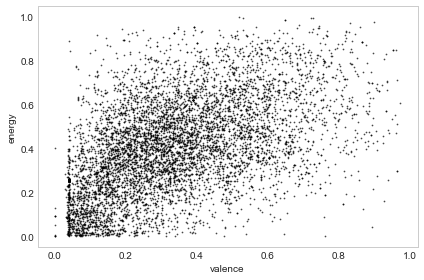

In [8]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
X = df.as_matrix(columns=["sp_valence", "sp_energy"]).astype('float64')
# create data
x = X[:, 0]
y = X[:, 1]

# Create a figure with 6 plot areas
plt.xlabel('valence')
plt.ylabel('energy')
plt.legend()

# Everything sarts with a Scatterplot
plt.plot(x, y, 'ko', alpha=0.6, markersize=0.8)

 
# Thus we can cut the plotting window in several hexbins
nbins = 20
plt.xlabel('valence')
plt.ylabel('energy')
plt.legend()
 
# Change color palette
plt.xlabel('valence')
plt.ylabel('energy')
plt.legend()
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/data_plot.jpg', dpi = 300)
plt.show()





# Raga based study

## (1) Chanchal: Vrindavani Sarang or Tilak Kamod
### Ground Truth: lively, upbeat, easygoing

In [9]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where (name like \'%Sarang%\' and (name like \'%Vrindavani%\' or name like \'%Brindabani%\' or name like \'%Gaud%\' or name like \'%Shuddha%\') or name like \'%Kamod%\' or name like \'%Tilak%\' or name like \'Hindol\' or name like \'" + "Mangal Bhairav" + "\' or name like \'Kalawati\' or name like \'Kalavati\' or name like \'Hansdhwani\' or name like \'Hamsdhwani\' or name like \'Puriya\' or name like \'Rageshree\'  or name like \'Rageshree\' or name like \'Pilu\' or name like \'Piloo\')"
#(name like \'%Drut%\') and 
df_chanchal = query_db_translate_to_pandas(con, querystr)
df_chanchal.name

0                                Raga Tilak Kamod - Dhun
1                                 Raga Brindabani Sarang
2      Raag Tilak Kamod: Drut Teental - Neer Bharan K...
3                                      Brindabani Sarang
4      Raga:Tilak Shyam in Yamani Bilawal "Tilak Shya...
5                                                   Pilu
6                                                 Puriya
7                                            Tilak Kamod
8                                                  Piloo
9                            Raga Kamod, Gat In Jhaptaal
10                   Raga Shuddha Sarang: Alap In Ektaal
11                                                Hindol
12                                                Puriya
13       Raga Shuddha Sarang (Dhrupad Bandish - Jhaptal)
14                   Raga Kamod - Alap - Vilambit Ektaal
15                    Raga Tilak Kamod - Alap - Jhaptaal
16                                       Rag Tilak Kamod
17                             

#### Mood analysis on GN data

        gn_mood_1  id
13       Peaceful  82
12        Serious  31
11          Fiery   7
10      Easygoing   5
8        Romantic   3
9          Somber   3
6          Gritty   2
7          Lively   2
0        Brooding   1
1         Sensual   1
2     Sentimental   1
3   Sophisticated   1
4        Stirring   1
5          Tender   1
        gn_mood_1         id
13       Peaceful  58.156028
12        Serious  21.985816
11          Fiery   4.964539
10      Easygoing   3.546099
8        Romantic   2.127660
9          Somber   2.127660
6          Gritty   1.418440
7          Lively   1.418440
0        Brooding   0.709220
1         Sensual   0.709220
2     Sentimental   0.709220
3   Sophisticated   0.709220
4        Stirring   0.709220
5          Tender   0.709220
[58.156028368794317, 21.985815602836876, 4.9645390070921982, 3.5460992907801416, 2.1276595744680846, 2.1276595744680846, 1.4184397163120566, 1.4184397163120566, 0.70921985815602828, 0.70921985815602828, 0.70921985815602828, 0.709219858

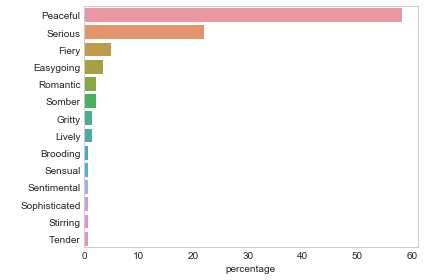

In [12]:
df_chanchal_gn = df_chanchal[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
# print(df_vrindavanisarang_stats.columns)
df_chanchal_gn = df_chanchal_gn.sort_values('id', ascending= False)
print(df_chanchal_gn)
df_chanchal_gn['id'] = df_chanchal_gn['id']/(df_chanchal_gn['id'].sum())*100
print(df_chanchal_gn)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_chanchal_gn)
# plt.xticks(rotation=90);
percentage = []
for x in df_chanchal_gn['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_chanchal_gn['id'].as_matrix())))
print(percentage)
plt.xlabel('percentage')
plt.ylabel(" ")
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
# plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_gat_gn.jpg', dpi = 300)

# Mood analysis

### Alaap

In [14]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where (name like \'%Alap%\' or name like \'%Alaap%\') and (name like \'%Sarang%\' and (name like \'%Vrindavani%\' or name like \'%Brindabani%\' or name like \'%Gaud%\' or name like \'%Shuddha%\') or name like \'%Kamod%\' or name like \'%Tilak%\')"
df_chanchal_alap = query_db_translate_to_pandas(con, querystr)
df_chanchal_alap.name

0                   Raga Shuddha Sarang: Alap In Ektaal
1                   Raga Kamod - Alap - Vilambit Ektaal
2                    Raga Tilak Kamod - Alap - Jhaptaal
3     Raga Tilak Kamod - Alap, Gat In Vilambit Teent...
4     Raga Tilak Kamod - Alap, Gat In Vilambit Teent...
5     Raga Tilak Kamod: Alap in Gat Vilambit and Dru...
6     Raga Kamod: Alap ,Jod, Gat In Vilambit / Drut ...
7                    Raga Tilak Shyam: Alap in Teentaal
8                         Raga Tilak Kamod-Alap (Sitar)
9                                 Raga Gaud Sarang Alap
10                              Tilak Kamod: Short Alap
11                   Raga Tilak Shyam: Alap In Teentaal
12    Raga Brindabani Sarang Alap - Raga Brindabani ...
13      Raga Tilak Kamod - Alap - Jod - Gat - Bhairavee
14                   Raga Gaud Sarang - Alap - Teentaal
15                                     Raga Kamod: Alap
Name: name, dtype: object

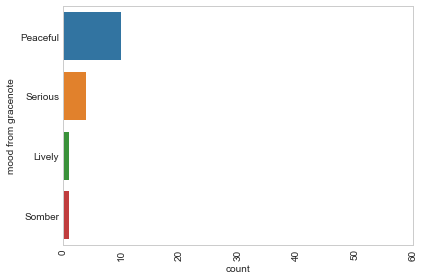

In [15]:
df_chanchal_alap_gn = df_chanchal_alap[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_chanchal_alap_gn = df_chanchal_alap_gn.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_chanchal_alap_gn)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_alap_gn.jpg', dpi = 300)

(16, 2)


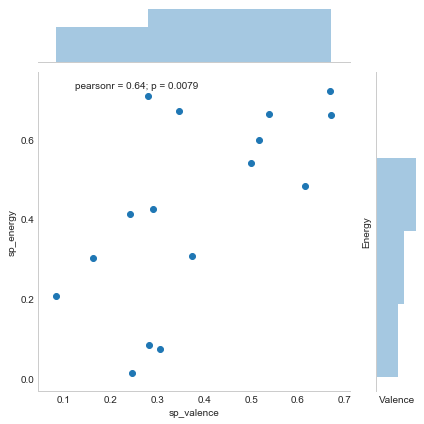

In [16]:
df_chanchal_alap_sp = df_chanchal_alap[['id', 'sp_valence', 'sp_energy']]
df_chanchal_alap_sp = df_chanchal_alap_sp[['sp_valence', 'sp_energy']].astype('float64')
print(df_chanchal_alap_sp.shape)
sns.jointplot(x ='sp_valence', y ='sp_energy', data = df_chanchal_alap_sp)
plt.xlabel('Valence')
plt.ylabel('Energy')
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_alap_sp.jpg', dpi = 300)

In [17]:
#Bageshree, Gara, Puriya Dhanashree, Madhuvanti
con = get_db_handle()
querystr = "select * from ragafeaturedb where (name like \'%Gat%\' or name like \'%Tillana%\') and ((name like \'%Puriya%\' and (name like \'%Dhanashri%\' or name like \'%Dhanashree%\')) or name like \'%Bageshri%\' or name like \'%Gara%\' or name like \'%Madhuvanti%\')"
df_romantic_gat = query_db_translate_to_pandas(con, querystr)
df_romantic_gat

,id,name,url,sp_danceability,sp_energy,sp_key,sp_loudness,sp_mode,sp_speechiness,sp_acousticness,...,sp_tempo,gn_gnid,gn_genre_1,gn_genre_2,gn_genre_3,gn_mood_1,gn_mood_2,gn_tempo_1,gn_tempo_2,gn_tempo_3
0,2RBbLhKeaOY7EQULjshHtv,Raga Bageshri: Gat In Ektaal,https://open.spotify.com/track/2RBbLhKeaOY7EQU...,0.301,0.405,2,-15.568,1,0.0457,0.986,...,83.7,3215200-9F7EF09013E5D657723AAFB9D304DAA7,Traditional,Indian Traditional,Hindustani,Peaceful,Quiet / Introspective,Slow Tempo,Slow,40s
1,5KPoVofDt498tHNjLmIwud,Raga Madhuvanti - Gat In Dhrut Teental,https://open.spotify.com/track/5KPoVofDt498tHN...,0.374,0.655,0,-15.972,1,0.118,0.734,...,82.744,34301522-4113AD80A318D5CF80EA76E2A712562E,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,60s
2,1w0aA57wJnlva6HQiHvST7,"Raga:Madhuvanti in Aalap,Gat In Vilambit ,Madh...",https://open.spotify.com/track/1w0aA57wJnlva6H...,0.452,0.36,8,-18.401,1,0.0414,0.853,...,127.833,40423489-897664A105ABC05D9B28D61479F61C24,Traditional,Indian Traditional,Hindustani,Peaceful,Quiet / Introspective,Medium Tempo,Medium Slow,50s
3,1QA1FgMPJfnAFMHQ5A0NjV,Raga Madhuvanti - Gat in vilambit teentaal,https://open.spotify.com/track/1QA1FgMPJfnAFMH...,0.475,0.402,0,-17.386,1,0.0529,0.803,...,99.489,34301522-4113AD80A318D5CF80EA76E2A712562E,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,60s
4,26FVPbKLrlQzpOBSB6pIQG,Raga Bageshri - Gat - Teentaal,https://open.spotify.com/track/26FVPbKLrlQzpOB...,0.273,0.403,3,-13.901,1,0.0466,0.966,...,141.833,16533893-5BBD045A92A52E158FBE450F390ADE00,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,70s
5,4PikHjdbSU1gS7Vpd1B6I1,Raga Bageshri: Gat In Drut Taal,https://open.spotify.com/track/4PikHjdbSU1gS7V...,0.482,0.441,11,-12.863,0,0.0464,0.988,...,96.876,61779056-1B8BF2959FEE38B71DDDF27547C8B684,Traditional,Other Traditions,General World,Serious,Hypnotic Rhythm,Medium Tempo,Medium Fast,100s
6,3NImMIvrEqpPdx28NkMk1h,Raga Bageshri - Gat In Drut Teentaal,https://open.spotify.com/track/3NImMIvrEqpPdx2...,0.339,0.532,5,-12.971,1,0.041,0.906,...,136.23,146122222-AC0C9CE238A252A6E3815A57F50F906E,Traditional,Indian Traditional,Hindustani,Peaceful,Delicate / Tranquil,Slow Tempo,Slow,40s
7,5gBDMDF1DSadqYdSER61Wi,"Raga Bageshri Alaap,gat: Madhyalaya Ek Taal, D...",https://open.spotify.com/track/5gBDMDF1DSadqYd...,0.401,0.604,0,-12.25,1,0.0453,0.939,...,103.891,61779056-1B8BF2959FEE38B71DDDF27547C8B684,Traditional,Other Traditions,General World,Serious,Hypnotic Rhythm,Medium Tempo,Medium Fast,100s
8,0IwglDRz14eGrMDfEHvY32,Raag Bageshri-Drut Gat,https://open.spotify.com/track/0IwglDRz14eGrMD...,0.239,0.928,6,-6.338,1,0.0681,0.531,...,131.255,347745782-9D36199360388EA993BA05AB68BDAD47,Traditional,Indian Traditional,Hindustani,Peaceful,Delicate / Tranquil,Medium Tempo,Medium Fast,90s
9,7sPeyBxVLnGtvEwYETAM2Z,Raag Bageshri-Vilambit Gat,https://open.spotify.com/track/7sPeyBxVLnGtvEw...,0.227,0.888,6,-6.249,1,0.052,0.669,...,85.788,347745781-FAC11753C959831E77C0C4A0DEAB250C,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,80s


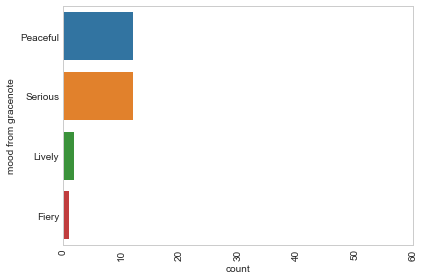

In [21]:
df_romantic_gat_gn = df_romantic_gat[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_romantic_gat_gn = df_romantic_gat_gn.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_romantic_gat_gn)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/romantic_gat_gn.jpg', dpi = 300)

(27, 2)


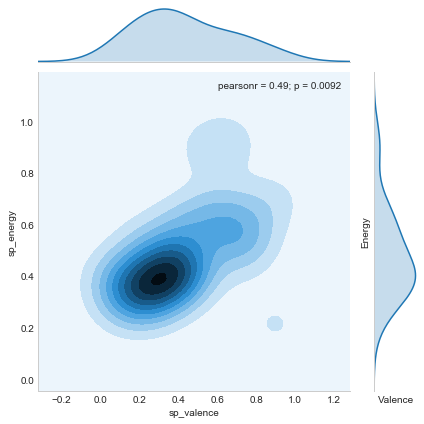

In [22]:
df_romantic_gat_sp = df_romantic_gat[['id', 'sp_valence', 'sp_energy']]
df_romantic_gat_sp = df_romantic_gat_sp[['sp_valence', 'sp_energy']].astype('float64')
print(df_romantic_gat_sp.shape)
sns.jointplot(x ='sp_valence', y ='sp_energy', data = df_romantic_gat_sp, kind='kde')
plt.xlabel('Valence')
plt.ylabel('Energy')
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/romantic_gat_sp.jpg', dpi = 300)

## Shahnai player bismillah khan

[68.644067796610173, 16.101694915254239, 8.4745762711864412, 3.3898305084745761, 0.84745762711864403, 0.84745762711864403, 0.84745762711864403, 0.84745762711864403]


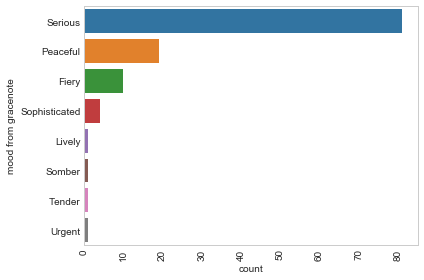

In [24]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'%Bismillah%\'"
df_bismillah = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_bismillah['id']:
    querystr = "select * from ragafeaturedb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_bk = pd.concat(flist)

#------------------------------------------------
df_bk = df_bk[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_bk = df_bk.sort_values('id', ascending= False)
percentage = []
for x in df_bk['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_bk['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_bk)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/bismillah.jpg', dpi = 300)

## Santoor player shivkumar sharma

[64.331210191082803, 27.388535031847134, 5.0955414012738851, 1.2738853503184713, 1.2738853503184713, 0.63694267515923564]


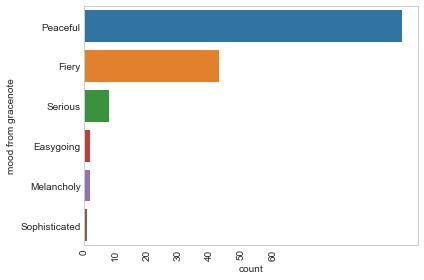

In [25]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Shivkumar Sharma" + "\'"
df_shivks = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_shivks['id']:
    querystr = "select * from ragafeaturedb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_shivks = pd.concat(flist)

#------------------------------------------------
df_shivks = df_shivks[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_shivks = df_shivks.sort_values('id', ascending= False)
percentage = []
for x in df_shivks['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_shivks['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_shivks)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/shivks.jpg', dpi = 300)

## Flautist Hariprasad Chaurasia

                       id                             name  \
0  6edOwFBabxn2WvPSzrJH1t  African Queen - Raga Hansdhwani   

                                                 url sp_danceability  \
0  https://open.spotify.com/track/6edOwFBabxn2WvP...           0.473   

  sp_energy sp_key sp_loudness sp_mode sp_speechiness sp_acousticness  \
0     0.274     11     -15.547       1         0.0521           0.975   

     ...     sp_tempo                                     gn_gnid  \
0    ...      148.525  452972395-FA1503E052035B321DBE0B3D4B17A095   

    gn_genre_1          gn_genre_2  gn_genre_3  gn_mood_1         gn_mood_2  \
0  Traditional  Indian Traditional  Hindustani  Easygoing  Hopeful / Breezy   

     gn_tempo_1   gn_tempo_2 gn_tempo_3  
0  Medium Tempo  Medium Fast        90s  

[1 rows x 23 columns]
[80.078125, 7.8125, 4.6875, 3.125, 1.171875, 1.171875, 0.78125, 0.390625, 0.390625, 0.390625]


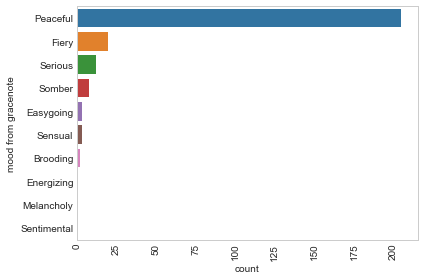

In [27]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Hariprasad Chaurasia" + "\' or artist_name like \'" + "Ronu Majumdar" + "\' or artist_name like \'" + "Rupak Kulkarni" + "\'"
df_flute = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_flute['id']:
    querystr = "select * from ragafeaturedb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_flute = pd.concat(flist)
print(df_flute[df_flute['id'] == '6edOwFBabxn2WvPSzrJH1t'])
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_flute = df_flute[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_flute = df_flute.sort_values('id', ascending= False)
percentage = []
for x in df_flute['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_flute['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_flute)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/haripc.jpg', dpi = 300)


## Tabla by Zakir Hussain

[50.0, 38.888888888888886, 5.5555555555555554, 5.5555555555555554]


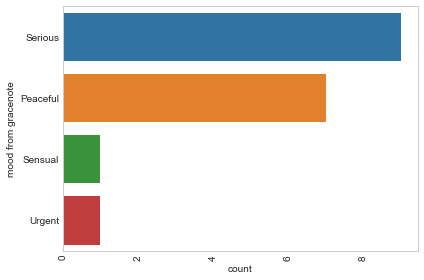

In [28]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Zakir Hussain" + "\' or artist_name like \'" + "Anindo Chatterjee" + "\'"
df_tabla = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_tabla['id']:
    querystr = "select * from ragafeaturedb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_tabla = pd.concat(flist)

#------------------------------------------------
df_tabla = df_tabla[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_tabla = df_tabla.sort_values('id', ascending= False)
percentage = []
for x in df_tabla['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_tabla['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_tabla)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/tabla.jpg', dpi = 300)

## Sitaar

[62.448132780082986, 23.443983402489625, 5.809128630705394, 3.1120331950207469, 2.2821576763485476, 1.4522821576763485, 0.41493775933609961, 0.41493775933609961, 0.41493775933609961, 0.2074688796680498]


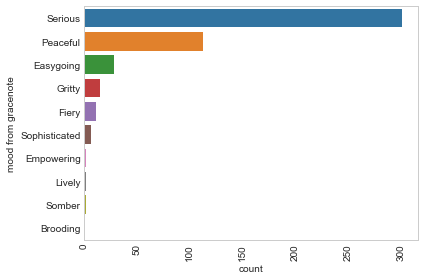

In [29]:
# ali akbar khan, vilayat khan, shahid parvez, ravishankar, budhaditya mukherjee, rash behari datta, shujaat khan
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Ali Akbar Khan" + "\' or artist_name like \'" + "Anoushka Shankar" + "\' or artist_name like \'" + "Vilayat Khan" + "\' or artist_name like \'" + "Shahid Parvez" + "\' or artist_name like \'" + "Ravi Shankar" + "\'"
df_sitar = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_sitar['id']:
    querystr = "select * from ragafeaturedb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_sitar = pd.concat(flist)

#------------------------------------------------
df_sitar = df_sitar[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_sitar = df_sitar.sort_values('id', ascending= False)
percentage = []
for x in df_sitar['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_sitar['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_sitar)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/sitar.jpg', dpi = 300)

## Slow tempo or Vilambit

(422, 23)
[53.554502369668249, 18.246445497630333, 13.507109004739336, 5.2132701421800949, 2.1327014218009479, 1.4218009478672986, 1.4218009478672986, 0.94786729857819907, 0.7109004739336493, 0.7109004739336493, 0.7109004739336493, 0.47393364928909953, 0.23696682464454977, 0.23696682464454977, 0.23696682464454977, 0.23696682464454977]


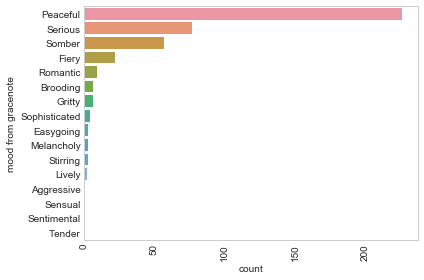

In [30]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where name like \'%Vilambit%\' and name not like \'%Drut%\'"
df_vilambit = query_db_translate_to_pandas(con, querystr)
print(df_vilambit.shape)

#-------------------------------------------------------
df_vl = df_vilambit[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_vl = df_vl.sort_values('id', ascending= False)

percentage = []
for x in df_vl['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_vl['id'].as_matrix())))
print(percentage)

ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_vl)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/vilambit.jpg', dpi = 300)

## Fast tempo or Drut/Gat

(600, 23)
[  1   2   2   2   3   4   4   5   6   6   6   9  24 115 199 212]
[0.16666666666666666, 0.33333333333333331, 0.33333333333333331, 0.33333333333333331, 0.5, 0.66666666666666663, 0.66666666666666663, 0.83333333333333337, 1.0, 1.0, 1.0, 1.5, 4.0, 19.166666666666668, 33.166666666666664, 35.333333333333336]


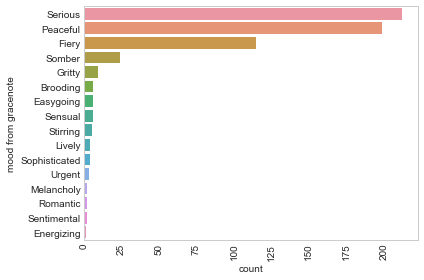

In [31]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where name like \'%Drut%\' and name not like \'%Vilambit%\'"
df_fast = query_db_translate_to_pandas(con, querystr)
print(df_fast.shape)

#-------------------------------------------------------
df_fast = df_fast[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_fast['id'].as_matrix())

percentage = []
for x in df_fast['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_fast['id'].as_matrix())))
print(percentage)

df_fast = df_fast.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_fast)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/drut.jpg', dpi = 300)

## how to add percentage to barplot?

## Singing style

## Alap

(971, 23)
[  1   1   1   2   2   3   3   4   6   8   9  10  11  13  17  26 134 230
 490]
[0.10298661174047374, 0.10298661174047374, 0.10298661174047374, 0.20597322348094749, 0.20597322348094749, 0.30895983522142123, 0.30895983522142123, 0.41194644696189497, 0.61791967044284246, 0.82389289392378995, 0.92687950566426369, 1.0298661174047374, 1.1328527291452111, 1.3388259526261586, 1.7507723995880535, 2.6776519052523171, 13.800205973223481, 23.68692070030896, 50.46343975283213]


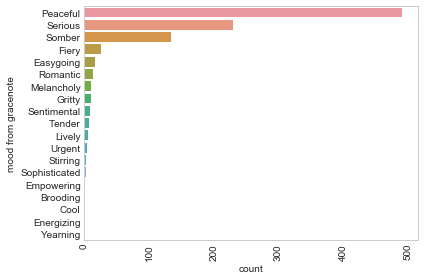

In [32]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where name like \'%Alap%\' or name like \'%Alaap%\'"
df_alap = query_db_translate_to_pandas(con, querystr)
print(df_alap.shape)

#-------------------------------------------------------
df_alap = df_alap[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_alap['id'].as_matrix())

percentage = []
for x in df_alap['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_alap['id'].as_matrix())))
print(percentage)

df_alap = df_alap.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_alap)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/alap.jpg', dpi = 300)

## Khayal

(416, 23)
[  1   1   2   2   3   4   4   5  11  12  17  20  22  52  58 202]
[0.24038461538461539, 0.24038461538461539, 0.48076923076923078, 0.48076923076923078, 0.72115384615384615, 0.96153846153846156, 0.96153846153846156, 1.2019230769230769, 2.6442307692307692, 2.8846153846153846, 4.0865384615384617, 4.8076923076923075, 5.2884615384615383, 12.5, 13.942307692307692, 48.557692307692307]


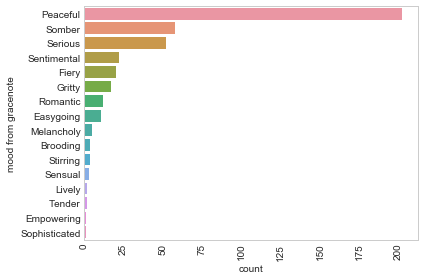

In [33]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where name like \'%Khayal%\' or name like \'%Khayaal%\'"
df_khayal = query_db_translate_to_pandas(con, querystr)
print(df_khayal.shape)

#-------------------------------------------------------
df_khayal = df_khayal[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_khayal['id'].as_matrix())

percentage = []
for x in df_khayal['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_khayal['id'].as_matrix())))
print(percentage)

df_khayal = df_khayal.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_khayal)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/khayal.jpg', dpi = 300)

## Tarana

(127, 23)
[ 1  1  1  1  2  2  3  3  7  8 10 38 50]
[0.78740157480314965, 0.78740157480314965, 0.78740157480314965, 0.78740157480314965, 1.5748031496062993, 1.5748031496062993, 2.3622047244094486, 2.3622047244094486, 5.5118110236220472, 6.2992125984251972, 7.8740157480314963, 29.921259842519685, 39.370078740157481]


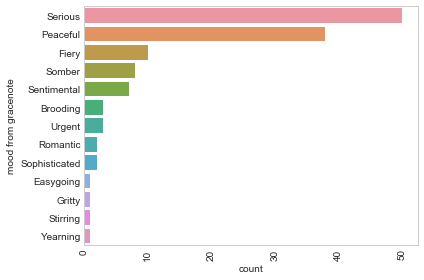

In [34]:
con = get_db_handle()
querystr = "select * from ragafeaturedb where name like \'%Tarana%\' or name like \'%taraana%\'"
df_tarana = query_db_translate_to_pandas(con, querystr)
print(df_tarana.shape)

#-------------------------------------------------------
df_tarana = df_tarana[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_tarana['id'].as_matrix())

percentage = []
for x in df_tarana['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_tarana['id'].as_matrix())))
print(percentage)

df_tarana = df_tarana.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_tarana)
plt.xticks(rotation=90);
plt.xlabel('count')
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/tarana.jpg', dpi = 300)